<a href="https://colab.research.google.com/github/ScarrryMary/Project_group24-25/blob/main/Seminar_1_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

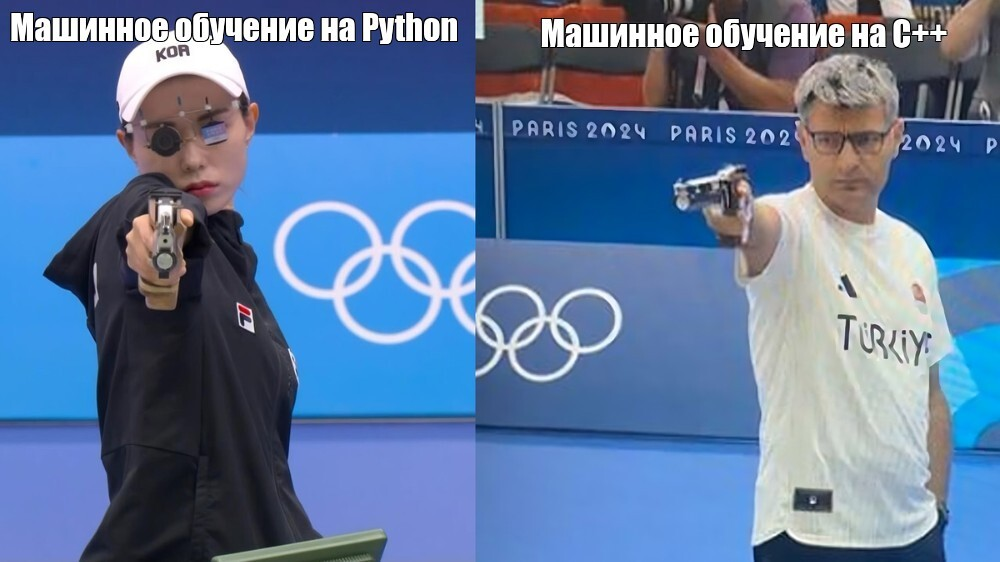

## Разбор контеста

### Задача №1  
1) The data

Text(0, 0.5, 'Min and max temperature')

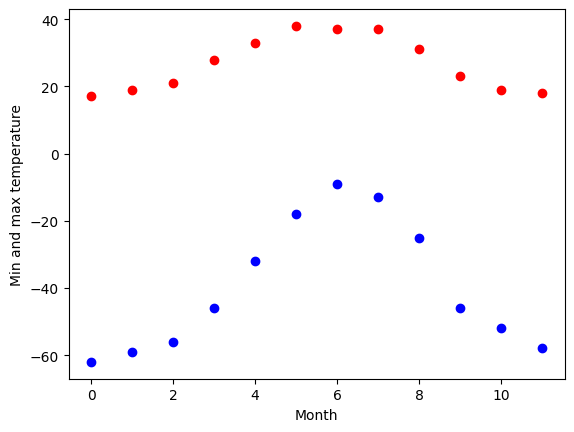

In [ ]:
import numpy as np

temp_max = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

import matplotlib.pyplot as plt

months = np.arange(12)
plt.plot(months, temp_max, "ro")
plt.plot(months, temp_min, "bo")
plt.xlabel("Month")
plt.ylabel("Min and max temperature")

2) Fitting it to a periodic function

In [ ]:
import scipy as sp


def yearly_temps(times, avg, ampl, time_offset):
    return avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max())


res_max, cov_max = sp.optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = sp.optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

3) Plotting the fit

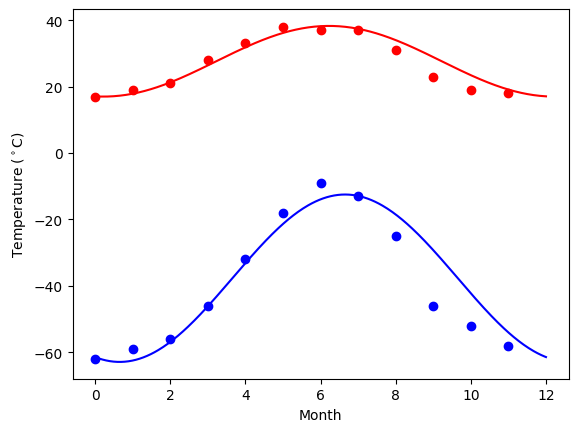

In [ ]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, "ro")
plt.plot(days, yearly_temps(days, *res_max), "r-")
plt.plot(months, temp_min, "bo")
plt.plot(days, yearly_temps(days, *res_min), "b-")
plt.xlabel("Month")
plt.ylabel(r"Temperature ($^\circ$C)")

plt.show()

### Задача №2  
1) Optimization of a two-parameter function

In [ ]:
import numpy as np


# Define the function that we are interested in
def sixhump(x):
    return (
        (4 - 2.1 * x[0] ** 2 + x[0] ** 4 / 3) * x[0] ** 2
        + x[0] * x[1]
        + (-4 + 4 * x[1] ** 2) * x[1] ** 2
    )


# Make a grid to evaluate the function (for plotting)
xlim = [-2, 2]
ylim = [-1, 1]
x = np.linspace(*xlim)  # type: ignore[call-overload]
y = np.linspace(*ylim)  # type: ignore[call-overload]
xg, yg = np.meshgrid(x, y)

2) A 2D image plot of the function

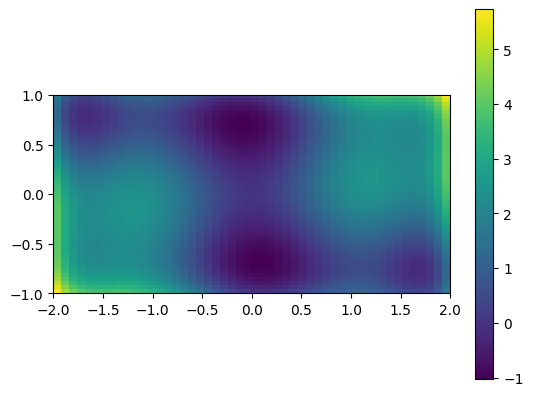

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(sixhump([xg, yg]), extent=xlim + ylim, origin="lower")  # type: ignore[arg-type]
plt.colorbar()

3) A 3D surface plot of the function

Text(0.5, 0.92, 'Six-hump Camelback function')

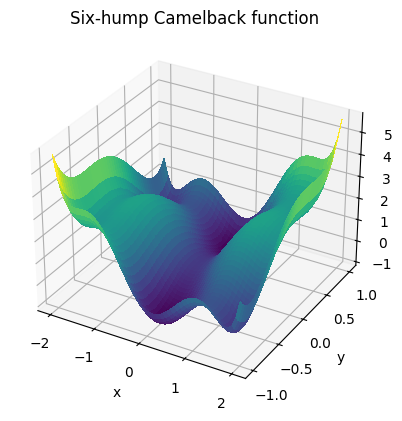

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax: Axes3D = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    xg,
    yg,
    sixhump([xg, yg]),
    rstride=1,
    cstride=1,
    cmap="viridis",
    linewidth=0,
    antialiased=False,
)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Six-hump Camelback function")

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0
        x: [ 0.000e+00  0.000e+00]
      nit: 0
      jac: [ 5.960e-08 -5.960e-08]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 3
     njev: 1
             message: Optimization terminated successfully.
             success: True
                 fun: -1.0316284534898768
                   x: [-8.984e-02  7.127e-01]
                 nit: 9
                nfev: 318
          population: [[-8.183e-02  7.128e-01]
                       [-8.298e-02  7.202e-01]
                       ...
                       [-1.324e-01  7.389e-01]
                       [-1.868e-02  6.858e-01]]
 population_energies: [-1.032e+00 -1.031e+00 ... -1.020e+00 -1.008e+00]
                 jac: [ 0.000e+00 -4.441e-08]


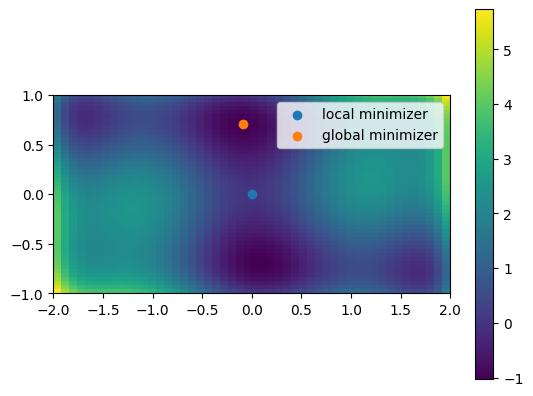

In [ ]:
import scipy as sp

# local minimization
res_local = sp.optimize.minimize(sixhump, x0=[0, 0])
print(res_local)

# global minimization
res_global = sp.optimize.differential_evolution(sixhump, bounds=[xlim, ylim])
print(res_global)
plt.figure()
# Show the function in 2D
plt.imshow(sixhump([xg, yg]), extent=xlim + ylim, origin="lower")  # type: ignore[arg-type]
plt.colorbar()
# Mark the minima
plt.scatter(res_local.x[0], res_local.x[1], label="local minimizer")
plt.scatter(res_global.x[0], res_global.x[1], label="global minimizer")
plt.legend()
plt.show()

### Задача №3

In [ ]:
import typing as tp

def find_max_sum_segment(array: tp.List[int], k: int) -> int:
    array_len = len(array)
    return np.tril(np.triu(np.broadcast_to(np.array([array]), (array_len - k + 1, array_len)), 0), k - 1).sum(axis=1).max()


### Задача №4

In [ ]:
def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    dist_matrix = np.sum((np.transpose(np.array([B] * A.shape[0]), (1, 2, 0)) - A.T) ** 2, axis=1)
    return (np.argsort(dist_matrix, axis=1).T[:k].T + np.ones((B.shape[0], k), dtype=int))

### Задача №5

In [ ]:
def matrix_multiplication(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    return np.sum(np.transpose(np.array([A] * B.shape[1]), (1, 0, 2)) * B.T, axis=2)

### Задача №6

In [ ]:
dat = plt.imread('MV_HFV_012.jpg')

1) Crop the image to remove the lower panel with measure information.

In [ ]:
dat = dat[:-60]

In [ ]:
filtdat = sp.ndimage.median_filter(dat, size=(7,7))
hi_dat = np.histogram(dat, bins=np.arange(256))
hi_filtdat = np.histogram(filtdat, bins=np.arange(256))

(array([[0., 2., 1., 2., 4., 3., 2., 7., 7., 5., 5., 4., 3., 1., 1., 3.,
         1., 2., 1., 2., 0., 3., 1., 0., 1., 1., 0., 2., 1., 0., 0., 0.,
         0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 2., 0., 0.,
         0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.

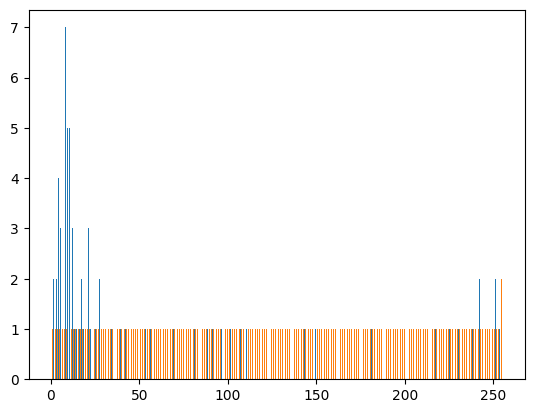

In [ ]:
plt.hist(hi_dat,bins=np.arange(256))

(array([[75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,
          0.,  1.,  0.,  1.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  2.,
          0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
          0.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  3.,  0.,  1.,
          1.,  0.,  1.,  1.,  0.,  1.,  2.,  2.,  0.,  1.,  2.,  0.,  3.,
          0.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
          1.,  2.,  0.,  4.,  0.,  0.,

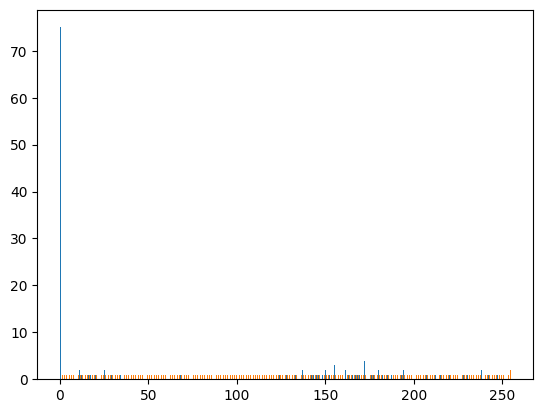

In [ ]:
plt.hist(hi_filtdat,bins=np.arange(256))

In [ ]:
void = filtdat <= 50
sand = np.logical_and(filtdat > 50, filtdat <= 114)
glass = filtdat > 114

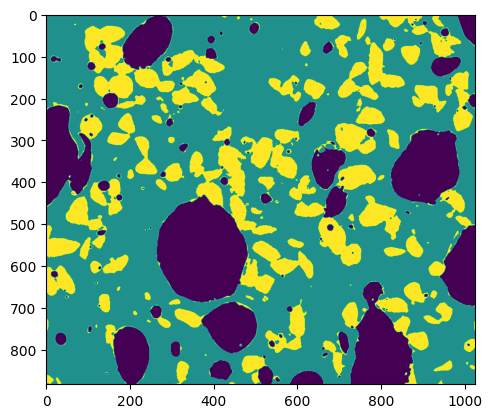

In [ ]:
phases = void.astype(int) + 2*glass.astype(int) + 3*sand.astype(int)

plt.imshow(phases)

Use mathematical morphology to clean the different phases.


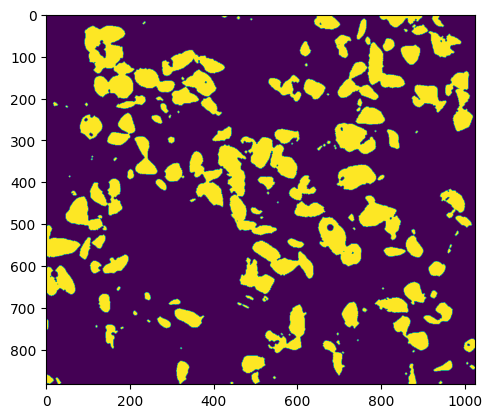

In [ ]:
sand_op = sp.ndimage.binary_opening(sand, iterations=2)

plt.imshow(sand_op)

Присвойте метки всем пузырькам и песчинкам и удалите из маски песка песчинки, которые меньше 10 пикселей. Для этого используйте sp.ndimage.sum или np.bincount для вычисления размеров песчинок.

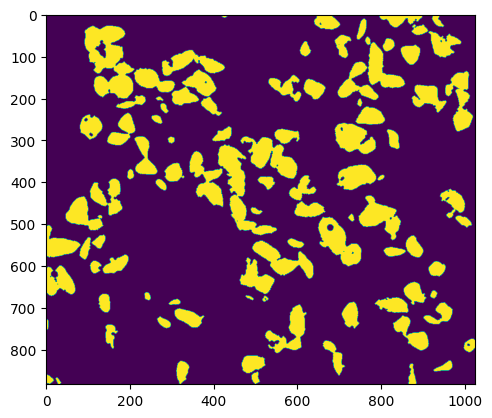

In [ ]:
sand_labels, sand_nb = sp.ndimage.label(sand_op)
sand_areas = np.array(sp.ndimage.sum(sand_op, sand_labels, np.arange(sand_labels.max()+1)))
mask = sand_areas > 100
remove_small_sand = mask[sand_labels.ravel()].reshape(sand_labels.shape)

plt.imshow(remove_small_sand)

In [ ]:
bubbles_labels, bubbles_nb = sp.ndimage.label(void)
bubbles_areas = np.bincount(bubbles_labels.ravel())[1:]
mean_bubble_size = bubbles_areas.mean()
median_bubble_size = np.median(bubbles_areas)
mean_bubble_size, median_bubble_size

(1699.875, 65.0)

### Библиотека Seaborn

In [17]:
import seaborn as sns

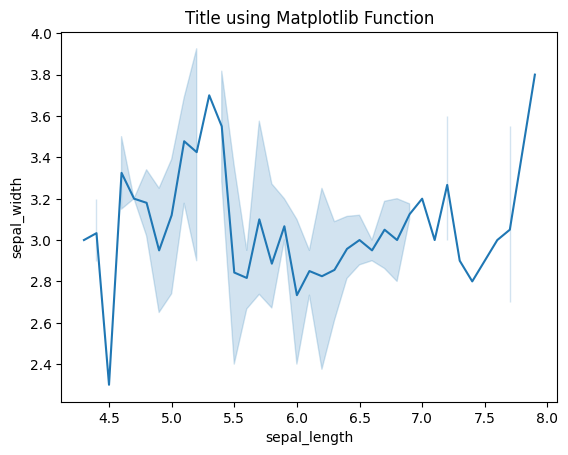

In [18]:
# loading dataset
data = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# setting the title using Matplotlib
plt.title('Title using Matplotlib Function')

plt.show()

Добавим ограничение

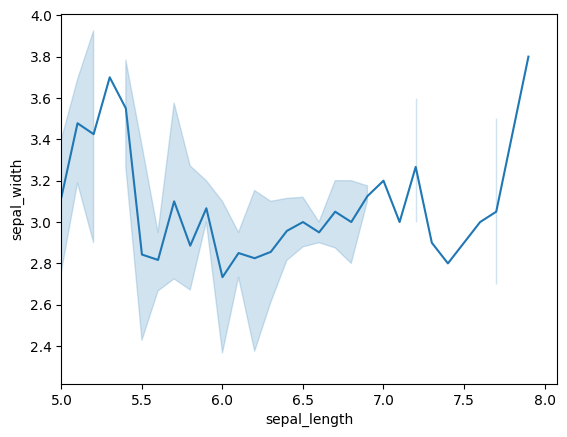

In [19]:
# loading dataset
data = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# setting the x limit of the plot
plt.xlim(5)

plt.show()

### Customizing Seaborn Plots  
Метод **set_style()** используется для установки эстетики графика. Это значит, что он влияет на такие вещи, как цвет осей, активна ли сетка или нет, или другие эстетические элементы. В Seaborn доступно пять тем.  
* darkgrid
* whitegrid
* dark
* white
* ticks  

Синтаксис:  

`set_style(style=None, rc=None)`

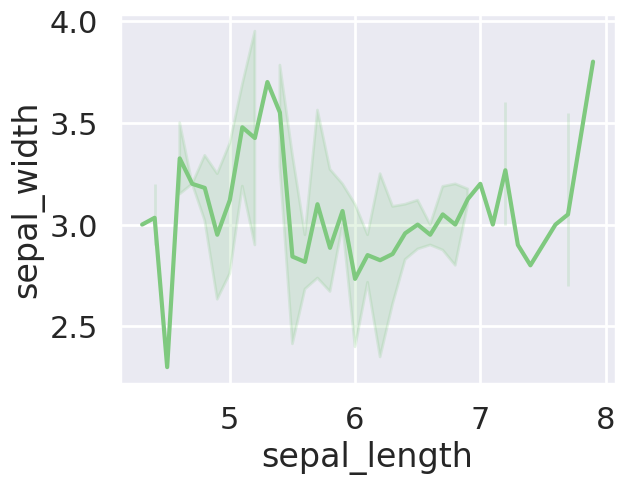

In [39]:
# loading dataset
data1 = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data1)

# changing the theme to dark
#sns.set_style("darkgrid")
plt.show()

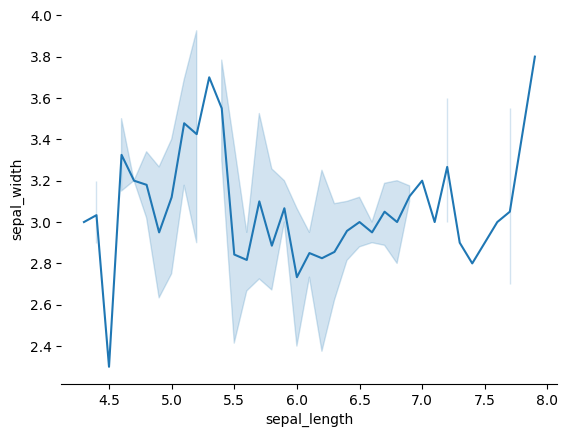

In [2]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data_new = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data_new)

# Removing the spines
sns.despine(left = True)
plt.show()

**Изменение размера фигуры**

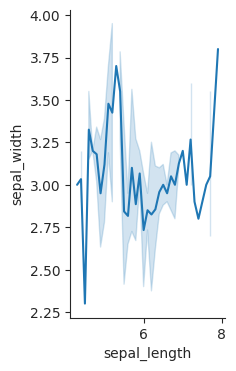

In [25]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

# changing the figure size
plt.figure(figsize = (2, 4))

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# Removing the spines
sns.despine()

plt.show()

**Масштабирование участков**  
Это можно сделать с помощью метода **set_context()**. Он позволяет нам переопределять параметры по умолчанию. Это влияет на такие вещи, как размер меток, линий и других элементов графика, но не на общий стиль. Базовый контекст — «notebook», а другие контексты — «paper», «talk» и «poster». font_scale задает размер шрифта.  

Синтаксис:  
`set_context(context=None, font_scale=1, rc=None)`

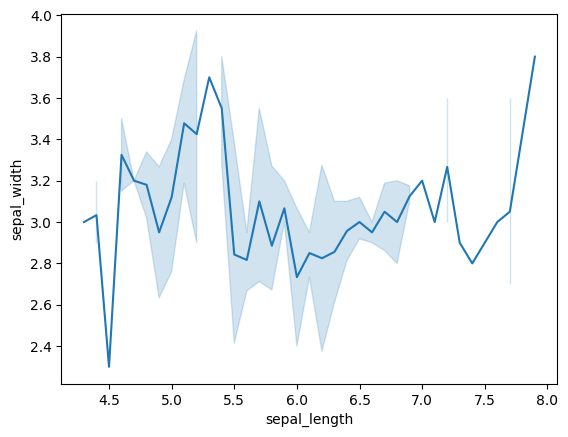

In [3]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data3 = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data3)

# Setting the scale of the plot
sns.set_context("paper")

plt.show()


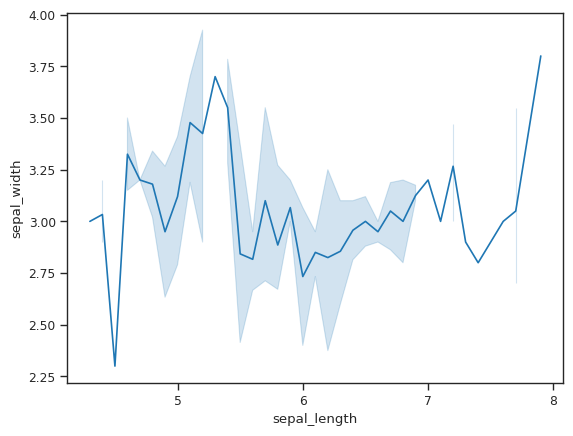

In [27]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data2 = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data2)

# Setting the scale of the plot
sns.set_context("talk")

plt.show()


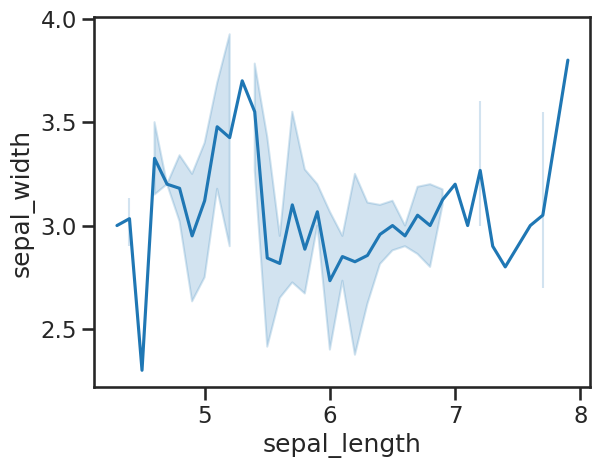

In [28]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data1 = sns.load_dataset("iris")

# draw lineplot
sns.lineplot(x="sepal_length", y="sepal_width", data=data1)

# Setting the scale of the plot
sns.set_context("poster")

plt.show()

**Временная установка стиля**  
Метод **axes_style()** используется для временной установки стиля. Он используется вместе с оператором **with**.  
Синтаксис:  
`axes_style(style=None, rc=None)`

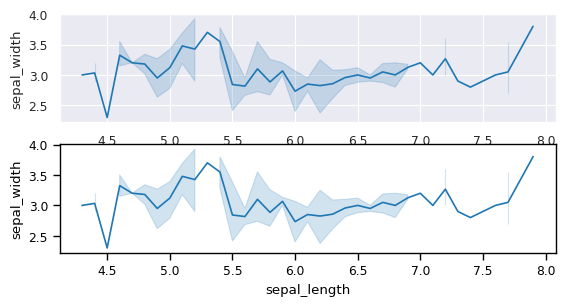

In [7]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data4 = sns.load_dataset("iris")


def plot():
	sns.lineplot(x="sepal_length", y="sepal_width", data=data4)

with sns.axes_style('darkgrid'):

	# Adding the subplot
	plt.subplot(311)
	plot()

plt.subplot(312)
plot()


plt.subplot(pos). Позиция задаётся трёхзначным числом, содержащим информацию о количестве строк, столбцов и индексе. Например, 212 означает подготовить разметку с двумя строками и одним столбцом, элемент вывести в первую позицию второй строки.

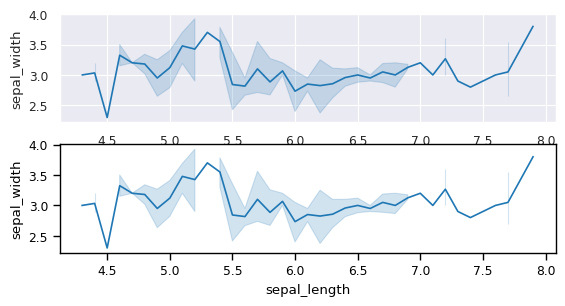

In [10]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data4 = sns.load_dataset("iris")


def plot():
	sns.lineplot(x="sepal_length", y="sepal_width", data=data4)

with sns.axes_style('darkgrid'):

	# Adding the subplot
	plt.subplot(311)
	plot()

plt.subplot(312)
#plt.figure(figsize = (10, 10))
plot()


**Цветовая палитра**  
Карты цветов используются для эффективной и простой визуализации графиков. Можно использовать различные виды карт цветов для различных видов графиков. Метод **color_palette()** используется для задания цветов графику. Другая функция **palplot()** используется для работы с цветовыми палитрами и отображает цветовую палитру в виде горизонтального массива.

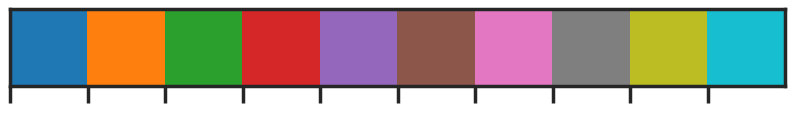

In [31]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# current colot palette
palette = sns.color_palette()

# plots the color palette as a
# horizontal array
sns.palplot(palette)

plt.show()


**Расходящаяся цветовая палитра**  
Этот тип цветовой палитры использует два разных цвета, где каждый цвет отображает разные точки, начиная от общей точки в любом направлении. Рассмотрим диапазон от -10 до 10, так что значение от -10 до 0 занимает один цвет, а значения от 0 до 10 занимают другой.

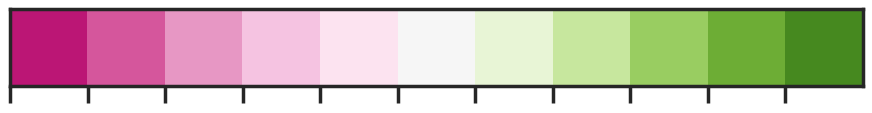

In [32]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# current colot palette
palette = sns.color_palette('PiYG', 11)

# diverging color palette
sns.palplot(palette)

plt.show()


**Последовательная цветовая палитра**  
Используется последовательная палитра, где распределение варьируется от меньшего значения к большему. Для этого добавьте символ 's' к цвету, переданному в цветовой палитре.

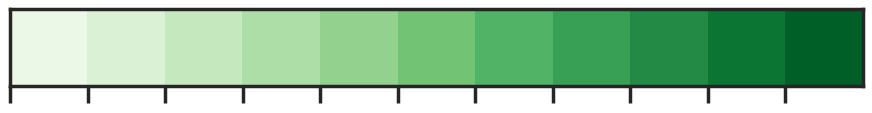

In [33]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# current colot palette
palette = sns.color_palette('Greens', 11)

# sequential color palette
sns.palplot(palette)

plt.show()

**Установка цветовой палитры по умолчанию**  
Метод **set_palette()** используется для установки цветовой палитры по умолчанию для всех графиков. Аргументы для **color_palette()** и **set_palette()** одинаковы. **set_palette()** изменяет параметры matplotlib по умолчанию.

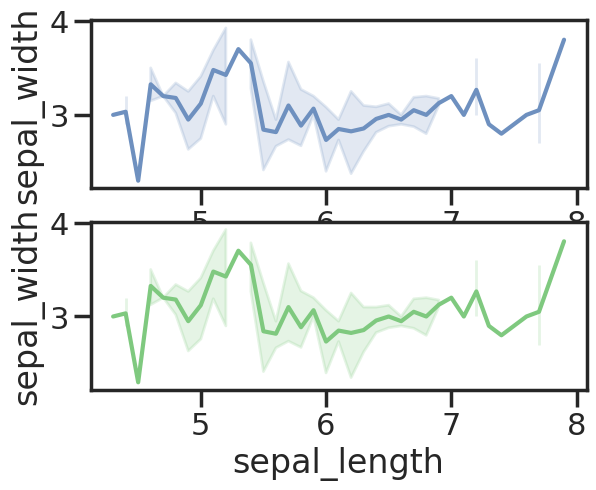

In [34]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

def plot():
	sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# setting the default color palette
sns.set_palette('vlag')
plt.subplot(211)

# plotting with the color palette
# as vlag
plot()

# setting another default color palette
sns.set_palette('Accent')
plt.subplot(212)
plot()

plt.show()

### Multiple plots with Seaborn  
**Использование Matplotlib**
Matplotlib предоставляет различные функции для построения подграфиков. Некоторые из них — **add_axes()**, **subplot()** и **subplot2grid()** . Давайте рассмотрим пример каждой функции для лучшего понимания.

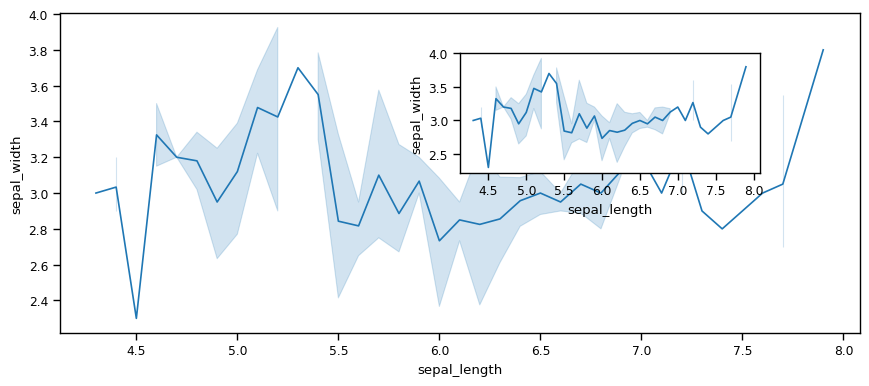

In [11]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


# loading dataset
data = sns.load_dataset("iris")

def graph():
	sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# Creating a new figure with width = 5 inches
# and height = 4 inches
fig = plt.figure(figsize =(10, 4))

# Creating first axes for the figure
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plotting the graph
graph()

# Creating second axes for the figure
ax2 = fig.add_axes([0.5, 0.5, 0.3, 0.3])

# plotting the graph
graph()

plt.show()


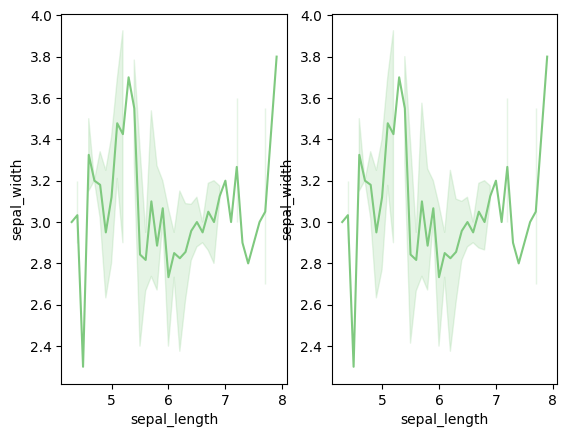

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

def graph():
	sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# Adding the subplot at the specified
# grid position
plt.subplot(121)
graph()

# Adding the subplot at the specified
# grid position
plt.subplot(122)
graph()

plt.show()


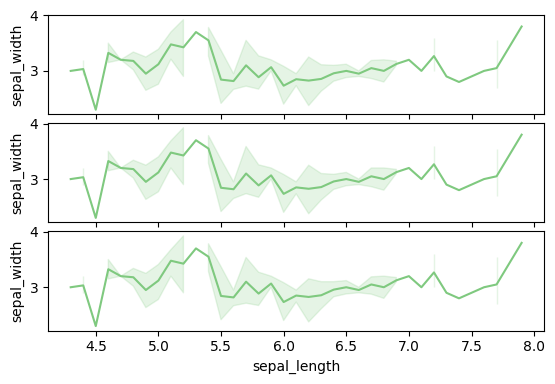

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

def graph():
	sns.lineplot(x="sepal_length", y="sepal_width", data=data)

# adding the subplots
axes1 = plt.subplot2grid (
(7, 1), (0, 0), rowspan = 2, colspan = 1)
graph()

axes2 = plt.subplot2grid (
(7, 1), (2, 0), rowspan = 2, colspan = 1)
graph()

axes3 = plt.subplot2grid (
(7, 1), (4, 0), rowspan = 2, colspan = 1)
graph()


**Using Seaborn**  
Метод 1: **FacetGrid()**  
* Класс FacetGrid помогает визуализировать распределение одной переменной, а также взаимосвязь между несколькими переменными по отдельности в подмножествах вашего набора данных с использованием нескольких панелей.
* FacetGrid может быть нарисован с тремя измерениями: row, col и hue. Первые два имеют очевидное соответствие с результирующим массивом осей; представьте переменную hue как третье измерение вдоль оси глубины, где разные уровни отображаются разными цветами.
* Объект FacetGrid принимает в качестве входных данных фрейм данных и имена переменных, которые будут формировать измерения строк, столбцов или оттенков сетки. Переменные должны быть категориальными, а данные на каждом уровне переменной будут использоваться для грани вдоль этой оси.




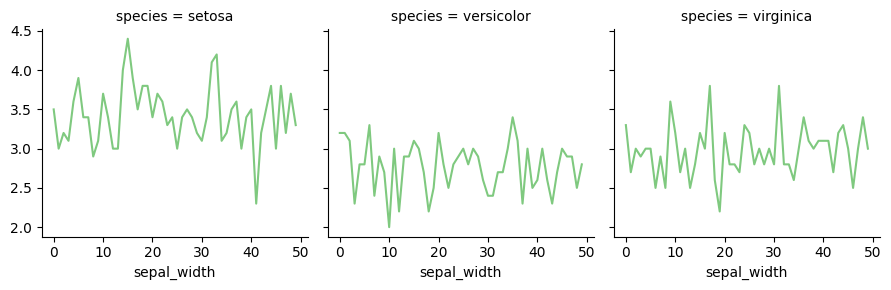

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

plot = sns.FacetGrid(data, col="species")
plot.map(plt.plot, "sepal_width")

plt.show()


Метод 2: **PairGrid()**  
* Сетка подграфиков для построения парных отношений в наборе данных.

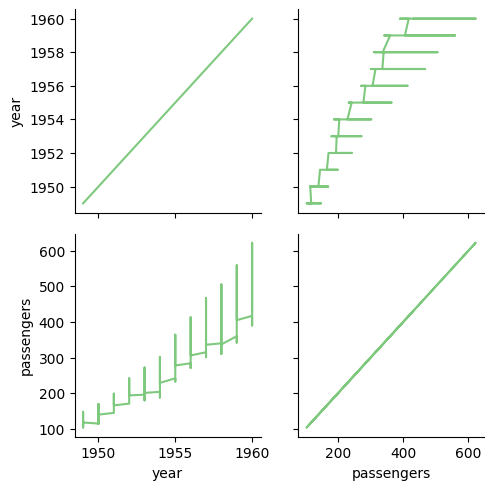

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("flights")

plot = sns.PairGrid(data)
plot.map(plt.plot)

plt.show()


### Relational Plots  

используются для визуализации статистической взаимосвязи между точками данных. Визуализация необходима, потому что она позволяет человеку видеть тенденции и закономерности в данных. Процесс понимания того, как переменные в наборе данных связаны друг с другом и их взаимосвязи, называется статистическим анализом.  

**Relplot()**  
Эта функция предоставляет нам доступ к некоторым другим функциям осевого уровня, которые показывают отношения между двумя переменными с помощью семантических отображений подмножеств.

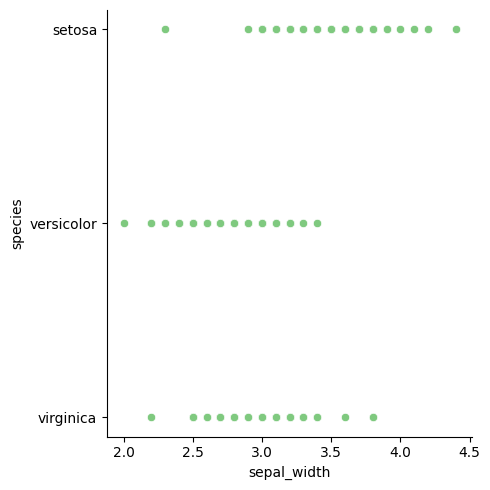

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

# creating the relplot
sns.relplot(x='sepal_width', y='species', data=data)

plt.show()


**Scatterplot()**  

Точечная диаграмма является основой статистической визуализации. Он отображает совместное распределение двух переменных с помощью облака точек, где каждая точка представляет наблюдение в наборе данных.  
Синтаксис:
`seaborn.scatterplot(x=None, y=None, data=None, **kwargs)`

<ipython-input-12-a08d597b2386>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='sepal_length', y='sepal_width', data=data, palette="husl")


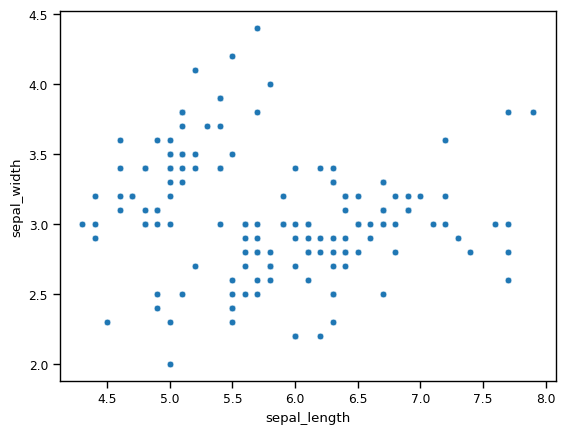

In [12]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.scatterplot(x='sepal_length', y='sepal_width', data=data, palette="husl")
plt.show()


**Line Plot**  
Для некоторых наборов данных можно рассматривать изменения как функцию времени в одной переменной или как аналогичную непрерывную переменную. В этом случае лучшим вариантом является построение линейного графика.


<ipython-input-13-c634f781eff9>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='sepal_length', y='species', data=data, palette="husl")


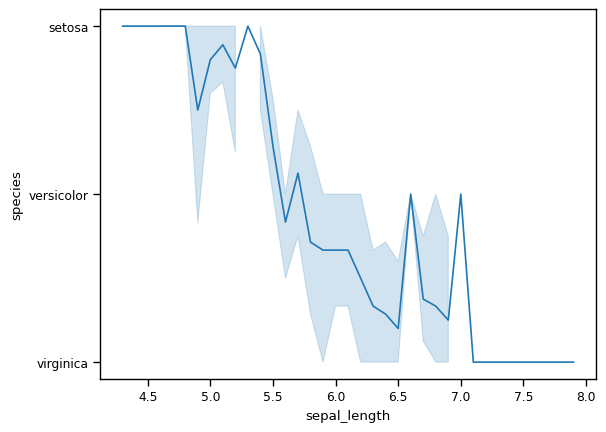

In [13]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.lineplot(x='sepal_length', y='species', data=data, palette="husl")
plt.show()


**Categorical Plots**

используются там, где нам нужно визуализировать связь между двумя числовыми значениями. Более специализированный подход может быть использован, если одной из основных переменных является категориальная, то есть такие переменные, которые принимают фиксированное и ограниченное число возможных значений.  

**1) Bar Plot**  
в основном используется для агрегации категориальных данных в соответствии с некоторыми методами, и по умолчанию это среднее значение. Его также можно понимать как визуализацию группы по действию. Чтобы использовать этот график, мы выбираем категориальный столбец для оси x и числовой столбец для оси y, и мы видим, что он создает график, принимающий среднее значение для категориального столбца. Его можно создать с помощью метода **barplot()**.










<ipython-input-14-24ec4b15a541>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='sepal_length', data=data0, palette="husl")


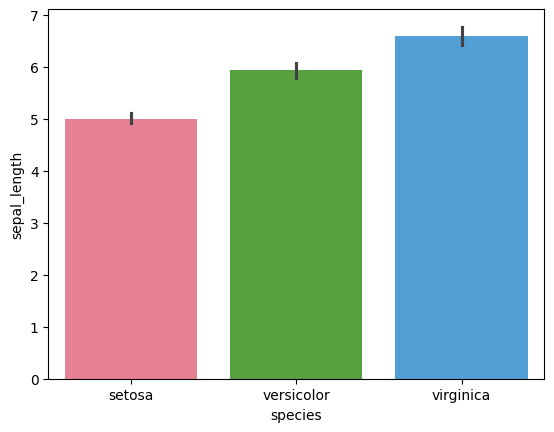

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка набора данных
data0 = sns.load_dataset("iris")

# Установка палитры и создание графика
sns.barplot(x='species', y='sepal_length', data=data0, palette="husl")

plt.show()



**2) Count Plot**

<ipython-input-15-0d79a8d0f58a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=data10, palette="husl")


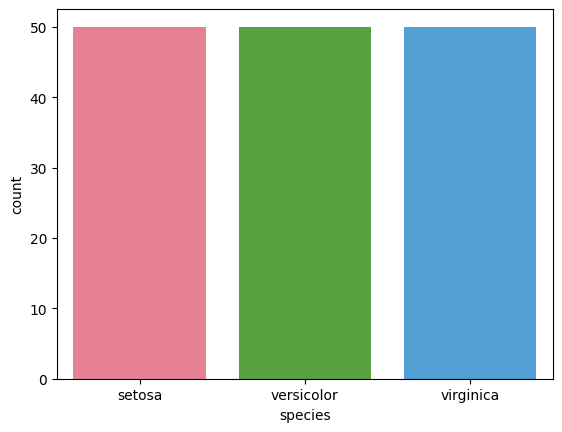

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data10 = sns.load_dataset("iris")

sns.countplot(x='species', data=data10, palette="husl")
plt.show()


**3) Box Plot**    
boxplot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution i.e. the dots indicating the presence of outliers.


<ipython-input-16-d63aaaf51690>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal_width', data=data, palette="husl")


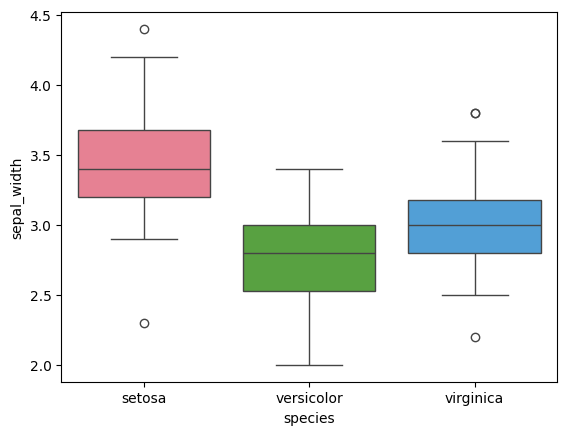

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.boxplot(x='species', y='sepal_width', data=data, palette="husl")
plt.show()


**4) Stripplot**  


<ipython-input-18-6e94805fec22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='species', y='sepal_width', data=data, palette="husl")


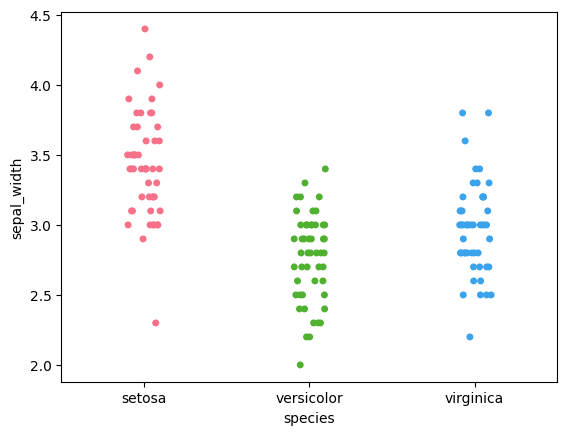

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.stripplot(x='species', y='sepal_width', data=data, palette="husl")
plt.show()


### Distribution Plots  
**Histogram**  
`histplot(data=None, *, x=None, y=None, hue=None,  **kwargs)`

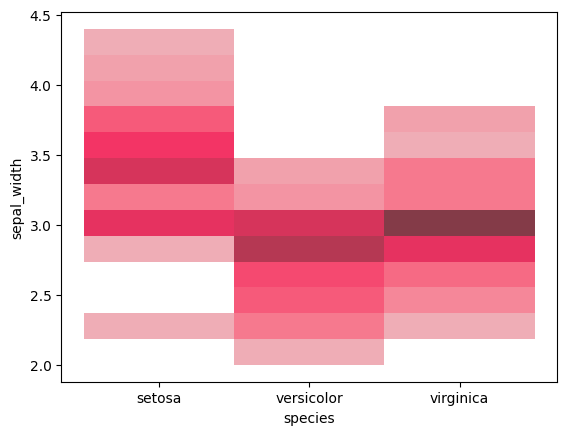

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.histplot(x='species', y='sepal_width', data=data)
plt.show()


**Distplot**  
`distplot(a[, bins, hist, kde, rug, fit, …])`

<ipython-input-20-93f31eccda70>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sepal_width'])


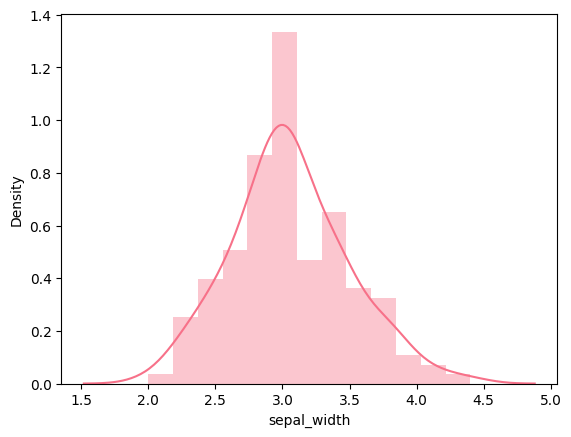

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.distplot(data['sepal_width'])
plt.show()


**Jointplot**  
Jointplot используется для построения графика двух переменных с двумерными и одномерными графиками. По сути, он объединяет два разных графика. Он строится с помощью метода **jointplot()**.

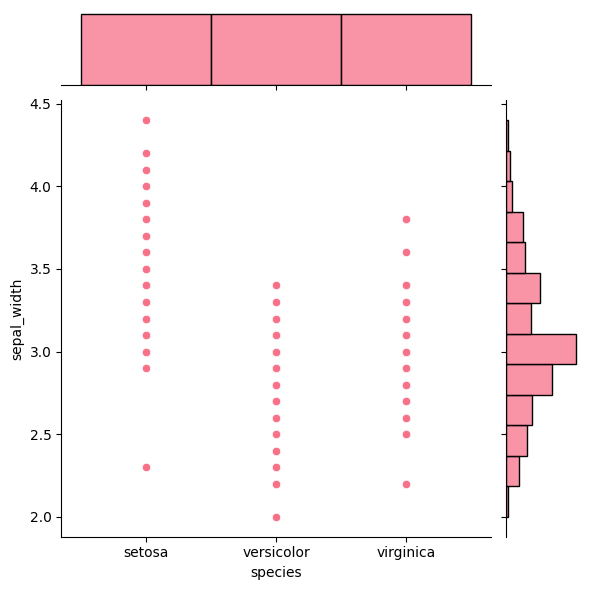

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.jointplot(x='species', y='sepal_width', data=data)
plt.show()


**Pairplot**  
представляет парное отношение по всему фрейму данных и поддерживает дополнительный аргумент, называемый оттенком, для категориального разделения. По сути, он создает совместный график между всеми возможными числовыми столбцами и занимает некоторое время, если фрейм данных действительно большой. Он строится с помощью метода **pairplot()**.

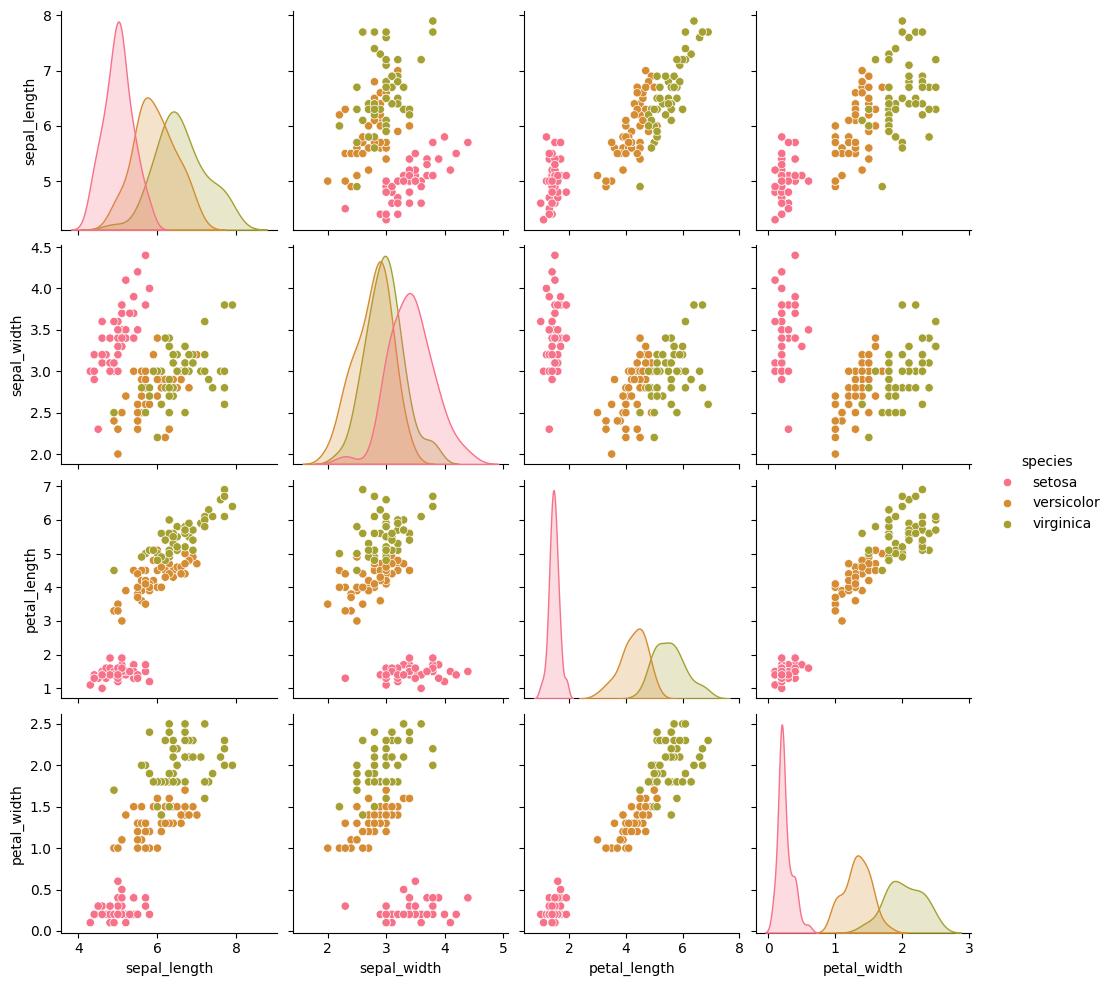

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.pairplot(data=data, hue='species')
plt.show()


**Rugplot**  
отображает точки данных в массиве как палки на оси. Так же, как distplot, он берет один столбец. Вместо того, чтобы рисовать гистограмму, он создает черточки по всему графику. Если вы сравните его с joinplot, вы увидите, что joinplot подсчитывает черточки и отображает их как ячейки. Он строится с помощью метода rugplot() .

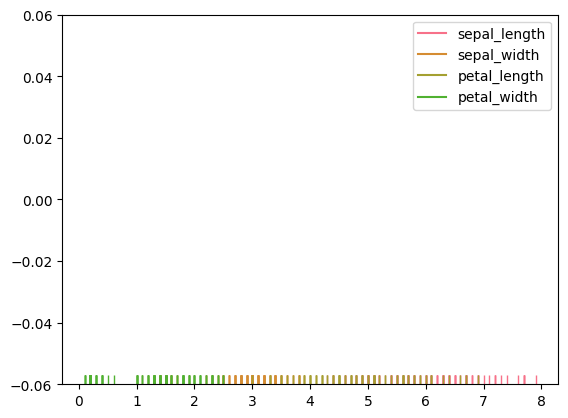

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.rugplot(data=data)
plt.show()


**KDE Plot**  
описанный как Kernel Density Estimate, используется для визуализации плотности вероятности непрерывной переменной. Он отображает плотность вероятности при различных значениях непрерывной переменной. Мы также можем построить один график для нескольких выборок, что помогает в более эффективной визуализации данных.

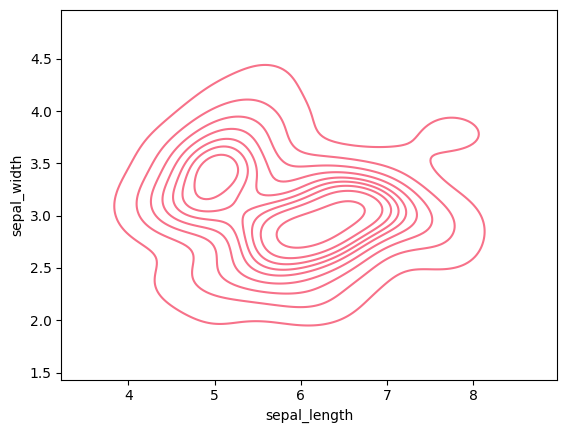

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("iris")

sns.kdeplot(x='sepal_length', y='sepal_width', data=data)
plt.show()


### Графики регрессии
**Графики регрессии** в первую очередь предназначены для добавления визуального руководства, которое помогает подчеркнуть закономерности в наборе данных во время разведочного анализа данных. Графики регрессии, как следует из названия, создают линию регрессии между двумя параметрами и помогают визуализировать их линейные взаимосвязи.  
Есть две основные функции, которые используются для построения моделей линейной регрессии. Эти функции — **lmplot()** и **regplot()**, тесно связаны друг с другом. Они даже разделяют свою основную функциональность.  

**lmplot**  
Метод **lmplot()** можно понимать как функцию, которая в основном создает линейный график модели. Он создает график рассеяния с линейной подгонкой поверх него.  
`seaborn.lmplot(x, y, data, hue=None, col=None, row=None, **kwargs)`

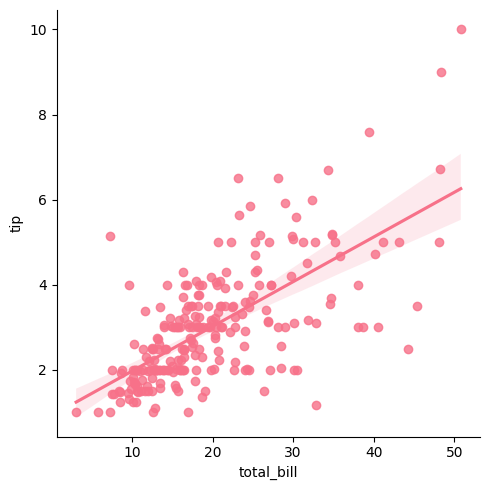

In [ ]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = sns.load_dataset("tips")

sns.lmplot(x='total_bill', y='tip', data=data)
plt.show()


Метод **regplot()** также похож на **lmplot**, который создает модель линейной регрессии.  
`seaborn.regplot( x, y, data=None, x_estimator=None, **kwargs)`

### Матричные графики  
**Тепловая карта**  
Тепловая карта определяется как графическое представление данных с использованием цветов для визуализации значения матрицы. В этом случае для представления более распространенных значений или более высокой активности используются более яркие цвета, в основном красноватые, а для представления менее распространенных или значений активности предпочтительны более темные цвета. ее можно построить с помощью функции **heatmap()**.  

`seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, annot_kws=None, linewidths=0, linecolor=’white’, cbar=True, **kwargs)`

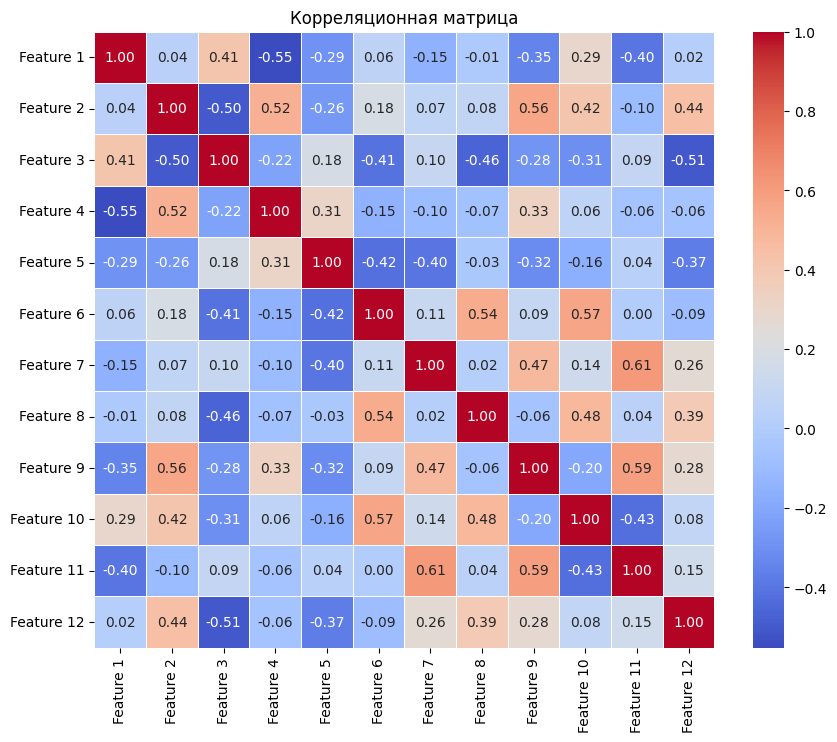

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Генерация случайных данных
np.random.seed(0)
data = np.random.rand(10, 12)  # 10 строк и 12 столбцов

# Создание DataFrame
df = pd.DataFrame(data, columns=[f'Feature {i}' for i in range(1, 13)])

# Рассчитываем корреляционную матрицу
corr_matrix = df.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Показать график
plt.title('Корреляционная матрица')
plt.show()

**Clustermap**  
Функция clustermap() seaborn рисует иерархически-кластеризованную тепловую карту заданного набора матричных данных. Кластеризация просто означает группировку данных на основе взаимосвязи между переменными в данных.

<Figure size 1000x800 with 0 Axes>

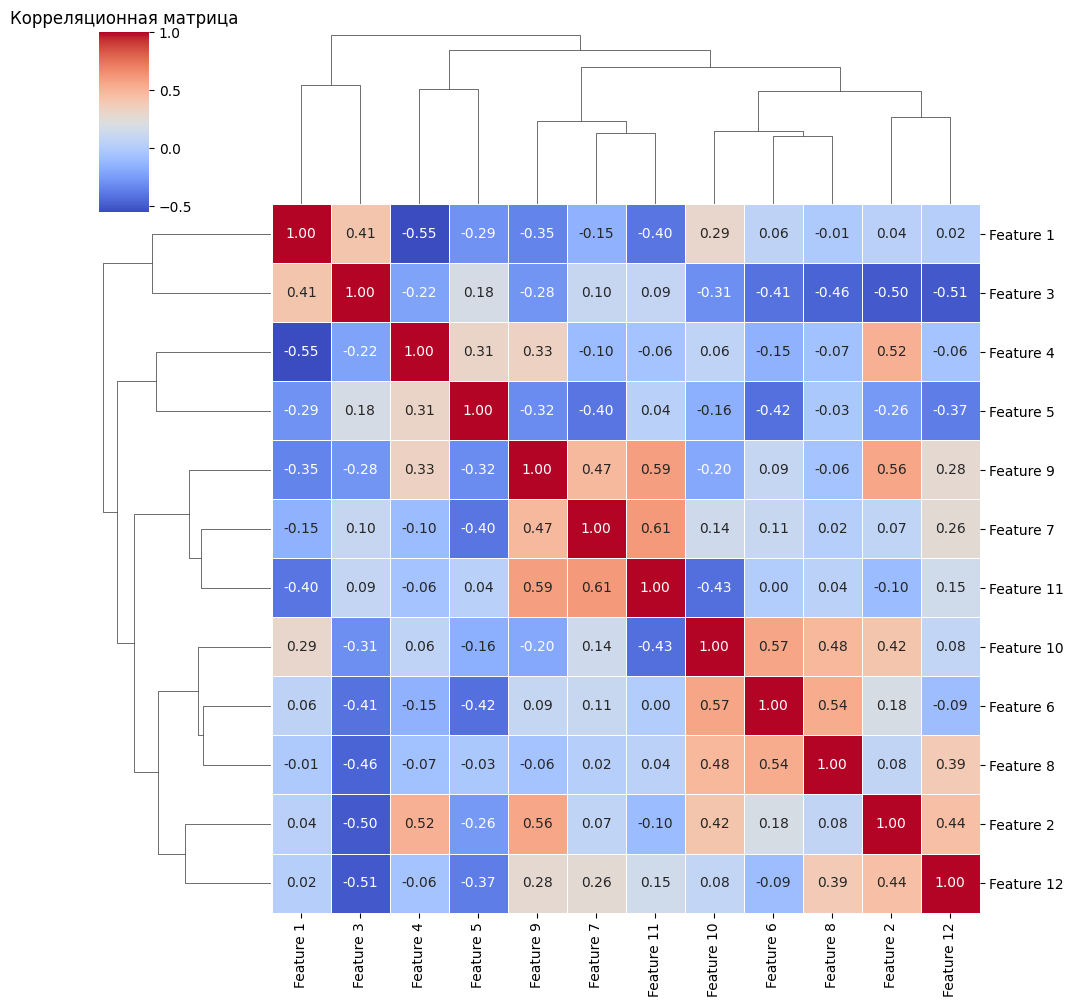

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Генерация случайных данных
np.random.seed(0)
data = np.random.rand(10, 12)  # 10 строк и 12 столбцов

# Создание DataFrame
df = pd.DataFrame(data, columns=[f'Feature {i}' for i in range(1, 13)])

# Рассчитываем корреляционную матрицу
corr_matrix = df.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Показать график
plt.title('Корреляционная матрица')
plt.show()

Допустим, вы хотите построить несколько диаграмм одновременно с помощью seaborn, в этом случае вы можете воспользоваться функцией subplot из matplotlib.

<ipython-input-34-5e11609f10b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='carat', data=diamonds_data, palette="husl")
<ipython-input-34-5e11609f10b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='depth', data=diamonds_data, palette="husl")


<Axes: xlabel='depth', ylabel='count'>

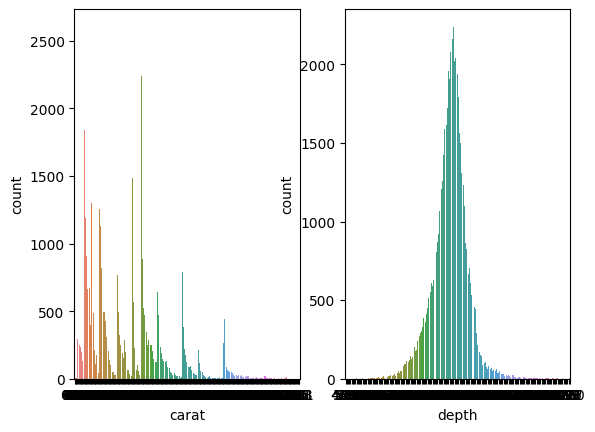

In [ ]:
diamonds_data = sns.load_dataset('diamonds')
plt.subplot(1, 2, 1)
sns.countplot(x='carat', data=diamonds_data, palette="husl")
plt.subplot(1, 2, 2)
sns.countplot(x='depth', data=diamonds_data, palette="husl")

NEXT: https://kgptalkie.medium.com/complete-seaborn-python-tutorial-for-data-visualization-in-python-399af0792ef4